# **Clean**

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Read Data

In [74]:
df_orders = pd.read_csv("raw/orders.csv")
df_restaurants = pd.read_csv("raw/restaurants.csv")

## Cleaning Columns

In [75]:
print("Orders Columns: \n", df_orders.columns)
print("Restaurants Columns: \n", df_restaurants.columns)

Orders Columns: 
 Index(['order_acknowledged_at', 'order_ready_at', 'order_value_gbp',
       'restaurant_id', 'number_of_items', 'prep_time_seconds'],
      dtype='object')
Restaurants Columns: 
 Index(['restaurant_id', 'country', 'city', 'type_of_food'], dtype='object')


### *df_orders.order_acknowledged_at*

In [76]:
df_orders.order_acknowledged_at

0        2015-06-01 12:28:28.952789+01:00
1        2015-06-06 17:06:24.434807+01:00
2        2015-06-08 14:56:15.503204+01:00
3        2015-06-12 15:12:20.497925+01:00
4        2015-06-01 13:07:10.794050+01:00
                       ...               
32389    2015-06-30 21:00:29.131078+01:00
32390    2015-06-30 22:30:51.123180+02:00
32391    2015-06-30 21:50:11.585362+01:00
32392    2015-06-30 22:17:55.778938+01:00
32393    2015-06-30 22:55:39.128579+01:00
Name: order_acknowledged_at, Length: 32394, dtype: object

The datetime column can be broken down to year, month, day of the week and hour of the day which may be good predictors.

### *df_orders.order_ready_at*

In [77]:
df_orders = df_orders.drop(columns=["order_ready_at"])

This column can not be used as it will not be available when predicting prep time.

### *df_orders.order_value_gbp*

In [78]:
df_orders.order_value_gbp.value_counts(dropna=False)

15.000000     549
15.500000     495
16.000000     466
17.000000     395
18.000000     321
             ... 
76.950000       1
139.450000      1
232.750000      1
83.400000       1
29.354365       1
Name: order_value_gbp, Length: 2845, dtype: int64

### *df_orders.prep_time_seconds*

In [79]:
print("99th percentile took", df_orders.prep_time_seconds.quantile(0.99) / 60 / 60, " hours.")
print("Longest delivery took ", df_orders.prep_time_seconds.max() / 60 / 60 / 24, " days.")
print(df_orders.prep_time_seconds.sort_values(ascending=False)[:25])

99th percentile took 2.120613888888889  hours.
Longest delivery took  2.957164351851852  days.
9807     255499
31228    116038
13166    113157
31749    111836
20760    110198
26678    108401
25431    108133
24550    107307
31756    100538
28451     98865
16170     97102
26721     97086
28907     96664
16267     93471
30267     92279
19301     91017
2710      90962
27642     90758
20849     89946
26947     89751
9766      89652
11793     89446
1425      88101
10092     87803
7548      87688
Name: prep_time_seconds, dtype: int64


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


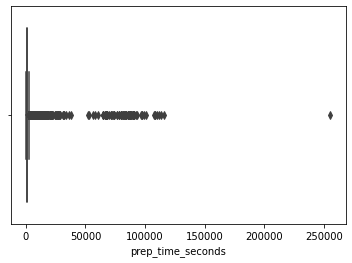

Total Outliers Removed:  152


In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(df_orders['prep_time_seconds'])
plt.show()

len_before = len(df_orders)
df_orders = df_orders[(np.abs(stats.zscore(df_orders["prep_time_seconds"])) < 3)]
print("Total Outliers Removed: ", len_before - len(df_orders))

In [81]:
# plt.figure(figsize=(6,4))
# sns.boxplot(df_orders['order_value_gbp'])
# plt.show()

# len_before = len(df_orders)
# df_orders = df_orders[(np.abs(stats.zscore(df_orders["order_value_gbp"])) < 3)]
# print("Total Outliers Removed: ", len_before - len(df_orders))

In [82]:
# plt.figure(figsize=(6,4))
# sns.boxplot(df_orders['number_of_items'])
# plt.show()

# len_before = len(df_orders)
# df_orders = df_orders[(np.abs(stats.zscore(df_orders["number_of_items"])) < 3)]
# print("Total Outliers Removed: ", len_before - len(df_orders))

### *df_restaurants.country*

In [83]:
df_restaurants.country.unique()

array(['UK', 'France', 'Ireland', 'Germany'], dtype=object)

In [84]:
df_restaurants = df_restaurants.drop(columns=["country"])

### *df_restaurants.city*

In [85]:
df_restaurants.city.unique()

array(['London', 'Paris', 'Brighton', 'Manchester', 'Oxford', 'Cambridge',
       'Reading', 'Birmingham', 'Bristol', 'Dublin', 'Berlin',
       'Nottingham', 'Liverpool', 'Leeds', 'Edinburgh', 'Glasgow',
       'Guildford', 'München', 'Cheltenham', 'Leicester', 'Cardiff',
       'Southampton'], dtype=object)

Here we can see only 1 city corresponding to Ireland, 2 cities corresponding to Germany and 1 city corresponding to France. 
This indicates that the country flag may not be very useful. It will also lead to city and country being correlated. 
For these reasons country will likely be dropped.

### *df_restaurants.type_of_food*

In [86]:
print(df_restaurants.type_of_food.unique())

['thai' 'italian' 'chinese' 'korean' 'lebanese' 'greek' 'japanese'
 'indian' 'mediterranean' 'american' 'burgers' 'healthy' 'vietnamese'
 'persian' 'burritos' 'argentinian' 'rotisserie' 'spanish tapas' 'dessert'
 'sichuan chinese' 'lebanese moroccan' 'sandwiches' 'juices' 'georgian'
 'pan asian' 'south indian' 'german' 'british' 'chicken' 'delicatessen'
 'european' 'austrian' 'peruvian' 'turkish' 'pizza' 'fish and chips'
 'mexican' 'australian' 'spanish' 'vegan' 'creole' 'ethiopian'
 'latin american' 'modern british' 'caribbean' 'bbq' 'ramen' 'soup'
 'international' 'portuguese' 'middle eastern' 'japanese peruvian'
 'bakery' 'brazilian' 'asian fusion' 'sweet treats' 'deli' 'french'
 'south african' 'south american' 'indonesian' 'bagels' 'malaysian'
 'nepalese' 'diner' 'north african' 'creperie' 'irish' 'gluten free'
 'bistro' 'french lebanese' 'sushi' 'sans gluten / brunch' 'thaï / brunch'
 'american / brunch' 'kosher' 'russian' 'taiwanese' 'seafood'
 'scandinavian' 'scottish' 'steakho

In [87]:
print(df_restaurants.type_of_food.value_counts().tail(25))

ramen                   2
creole                  2
spanish tapas           2
sichuan chinese         2
bistro                  2
thaï / brunch           1
kosher                  1
taiwanese               1
scandinavian            1
sans gluten / brunch    1
scottish                1
steakhouse              1
ethiopian               1
french lebanese         1
diner                   1
south american          1
south african           1
sweet treats            1
asian fusion            1
japanese peruvian       1
portuguese              1
soup                    1
austrian                1
delicatessen            1
ice cream               1
Name: type_of_food, dtype: int64


In [88]:
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("ice cream", "dessert")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("delicatessen", "deli")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("soup", "international")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("portuguese", "international")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("japanese peruvian", "japanese")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("asian fusion", "pan asian")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("sweet treats", "dessert")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("south african", "international")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("south american", "peruvian")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("diner", "bistro")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("french lebanese", "lebanese")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("ethiopian", "international")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("steakhouse", "international")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("scottish", "european")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("sans gluten / brunch", "gluten free")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("scandinavian", "european")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("taiwanese", "chinese")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("kosher", "middle eastern")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("thaï / brunch", "thai")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("sichuan chinese", "chinese")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("spanish tapas", "mexican")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("creole", "international")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("ramen", "pan asian")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("malaysian", "indonesian")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("austrian", "european")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("creperie", "dessert")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("lebanese moroccan", "lebanese")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("modern british", "british")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("american / brunch", "american")
df_restaurants.type_of_food = df_restaurants.type_of_food.replace("south indian", "indian")


This column will need to be revisited once dataframes are merged to see if there are any food types which have few individual orders.

### *Correlation*

In [89]:
df_orders.corr()

,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds
order_value_gbp,1.000000,-0.064760,0.553003,0.220560
restaurant_id,-0.064760,1.000000,-0.043060,-0.017683
number_of_items,0.553003,-0.043060,1.000000,0.142330
prep_time_seconds,0.220560,-0.017683,0.142330,1.000000


Above we can see that *order value* and *number of items* are **moderately** correlated. This is not definitavely a problem, however, it may be useful to create one feature which captures the information of both columns or drop one of the columns completely. I would be tentitive to drop either column as I feel both capture valuable information.

### Merge Data

In [90]:
df_orders

,order_acknowledged_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds
0,2015-06-01 12:28:28.952789+01:00,59.90000,1326,2,6220
1,2015-06-06 17:06:24.434807+01:00,24.00000,1326,8,603
2,2015-06-08 14:56:15.503204+01:00,15.25000,1326,3,443
3,2015-06-12 15:12:20.497925+01:00,28.05000,1326,8,669
4,2015-06-01 13:07:10.794050+01:00,56.30000,255,7,3314
...,...,...,...,...,...
32389,2015-06-30 21:00:29.131078+01:00,35.15000,3185,4,913
32390,2015-06-30 22:30:51.123180+02:00,9.15771,3556,3,201
32391,2015-06-30 21:50:11.585362+01:00,18.20000,3517,3,863
32392,2015-06-30 22:17:55.778938+01:00,21.50000,1705,3,1339


In [91]:
df_restaurants

,restaurant_id,city,type_of_food
0,3,London,thai
1,5,London,italian
2,7,London,italian
3,8,London,chinese
4,9,Paris,korean
...,...,...,...
1692,3594,Leeds,sushi
1693,3614,Paris,indonesian
1694,3618,Dublin,pan asian
1695,3620,Southampton,burritos


In [92]:
df_train = df_orders.merge(df_restaurants)
df_train

,order_acknowledged_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,city,type_of_food
0,2015-06-01 12:28:28.952789+01:00,59.90000,1326,2,6220,London,burritos
1,2015-06-06 17:06:24.434807+01:00,24.00000,1326,8,603,London,burritos
2,2015-06-08 14:56:15.503204+01:00,15.25000,1326,3,443,London,burritos
3,2015-06-12 15:12:20.497925+01:00,28.05000,1326,8,669,London,burritos
4,2015-06-01 13:07:10.794050+01:00,56.30000,255,7,3314,London,chinese
...,...,...,...,...,...,...,...
32237,2015-06-30 21:00:29.131078+01:00,35.15000,3185,4,913,Glasgow,italian
32238,2015-06-30 22:30:51.123180+02:00,9.15771,3556,3,201,Berlin,vietnamese
32239,2015-06-30 21:50:11.585362+01:00,18.20000,3517,3,863,Cheltenham,indian
32240,2015-06-30 22:17:55.778938+01:00,21.50000,1705,3,1339,London,italian


In [93]:
df_train.type_of_food.value_counts().tail(25)

middle eastern    167
international     147
peruvian          131
australian        108
spanish           101
seafood            90
brazilian          87
latin american     75
bakery             67
juices             62
rotisserie         55
sushi              45
caribbean          44
indonesian         38
sandwiches         37
vegan              30
german             30
nepalese           26
north african      25
bistro             24
georgian           19
gluten free        18
bagels             15
russian            12
irish               9
Name: type_of_food, dtype: int64

In [94]:
df_train.type_of_food = df_train.type_of_food.replace("irish", "european")
df_train.type_of_food = df_train.type_of_food.replace("russian", "international")
df_train.type_of_food = df_train.type_of_food.replace("bagels", "deli")
df_train.type_of_food = df_train.type_of_food.replace("sandwiches", "deli")
df_train.type_of_food = df_train.type_of_food.replace("gluten free", "healthy")
df_train.type_of_food = df_train.type_of_food.replace("georgian", "international")
df_train.type_of_food = df_train.type_of_food.replace("bistro", "international")
df_train.type_of_food = df_train.type_of_food.replace("north african", "middle eastern")
df_train.type_of_food = df_train.type_of_food.replace("nepalese", "indian")
df_train.type_of_food = df_train.type_of_food.replace("german", "european")
df_train.type_of_food = df_train.type_of_food.replace("vegan", "healthy")
df_train.type_of_food = df_train.type_of_food.replace("indonesian", "thai")
df_train.type_of_food = df_train.type_of_food.replace("sushi", "seafood")
df_train.type_of_food = df_train.type_of_food.replace("latin american", "mexican")
df_train.type_of_food = df_train.type_of_food.replace("rotisserie", "chicken")
df_train.type_of_food = df_train.type_of_food.replace("brazilian", "south american")
df_train.type_of_food = df_train.type_of_food.replace("peruvian", "south american")
df_train.type_of_food = df_train.type_of_food.replace("caribbean", "international")


In [95]:
df_train.to_csv("data/clean_data.csv", index=False)